In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
import itertools
from datetime import datetime
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import time

C:\Users\berge\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\berge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\berge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df = pd.read_csv('Lotto.csv',names=['1','2','3','4','5','6'],header=None,skiprows=1)
#df.drop(['index_num','Date','Extra'],axis=1,inplace=True)
df.dropna(inplace=True)
df = df.astype({"1": int,"2": int,"3": int,"4": int,"5": int,"6": int})
df.head()

,1,2,3,4,5,6
0,1,2,8,19,31,33
1,6,10,13,20,23,35
2,3,4,5,15,24,33
3,1,8,18,25,29,30
4,1,4,5,24,31,32


Text(0.5, 0, '6')

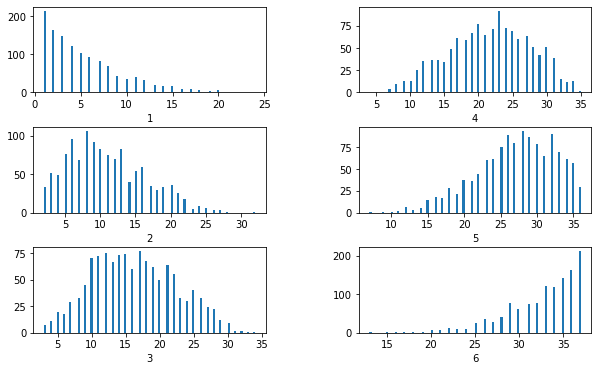

In [3]:
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(322)
ax5 = fig.add_subplot(324)
ax6 = fig.add_subplot(326)
ax1.hist(df['1'],bins=100);
ax1.set_xlabel("1", fontsize =10)
ax2.hist(df['2'],bins=100);
ax2.set_xlabel("2", fontsize =10)
ax3.hist(df['3'],bins=100);
ax3.set_xlabel("3", fontsize =10)
ax4.hist(df['4'],bins=100);
ax4.set_xlabel("4", fontsize =10)
ax5.hist(df['5'],bins=100);
ax5.set_xlabel("5", fontsize =10)
ax6.hist(df['6'],bins=100);
ax6.set_xlabel("6", fontsize =10)

In [4]:
a1 = df['1'].value_counts().values.tolist()
a1_index = df['1'].value_counts().index.tolist()

a2 = df['2'].value_counts().values.tolist()
a2_index = df['2'].value_counts().index.tolist()

a3 = df['3'].value_counts().values.tolist()
a3_index = df['3'].value_counts().index.tolist()

a4 = df['4'].value_counts().values.tolist()
a4_index = df['4'].value_counts().index.tolist()

a5 = df['5'].value_counts().values.tolist()
a5_index = df['5'].value_counts().index.tolist()

a6 = df['6'].value_counts().values.tolist()
a6_index = df['6'].value_counts().index.tolist()

In [38]:
print(a1)
print(a1_index)
print(f"length: {len(a1_index)}")
print("-----------------------------")
print(a2)
print(sum(a2))
print(a2_index)
print(f"length: {len(a2_index)}")
print("-----------------------------")
print(a3)
print(a3_index)
print(f"length: {len(a3_index)}")
print("-----------------------------")
print(a4)
print(a4_index)
print(f"length: {len(a4_index)}")
print("-----------------------------")
print(a5)
print(a5_index)
print(f"length: {len(a5_index)}")
print("-----------------------------")
print(a6)
print(a6_index)
print(f"length: {len(a6_index)}")

[214, 164, 147, 121, 103, 92, 82, 69, 43, 40, 35, 32, 20, 18, 16, 10, 10, 7, 7, 4, 2, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10, 12, 13, 15, 14, 16, 17, 18, 20, 19, 22, 21, 23, 24]
length: 24
-----------------------------
[106, 95, 91, 83, 82, 76, 75, 69, 68, 59, 54, 52, 49, 40, 36, 35, 33, 33, 30, 26, 18, 9, 6, 5, 4, 3, 1, 1]
1239
[8, 6, 9, 10, 13, 5, 11, 12, 7, 16, 15, 3, 4, 14, 20, 17, 19, 2, 18, 21, 22, 24, 25, 23, 26, 27, 28, 32]
length: 28
-----------------------------
[77, 75, 74, 73, 72, 70, 68, 67, 64, 62, 60, 55, 50, 45, 40, 33, 33, 33, 30, 29, 24, 22, 20, 18, 12, 11, 9, 7, 2, 2, 1, 1]
[17, 12, 15, 14, 11, 10, 18, 13, 21, 19, 16, 22, 20, 9, 25, 8, 23, 26, 24, 7, 27, 28, 5, 6, 29, 4, 30, 3, 31, 32, 33, 34]
length: 32
-----------------------------
[92, 77, 72, 71, 69, 67, 65, 63, 61, 60, 59, 51, 51, 49, 42, 39, 37, 36, 35, 34, 25, 15, 13, 13, 13, 12, 9, 4, 2, 1, 1, 1]
[23, 20, 24, 22, 25, 19, 21, 27, 17, 26, 18, 30, 28, 16, 29, 31, 13, 14, 12, 15, 11, 32, 9, 34, 10, 33, 8, 7,

#### The additional number [1-7] distribute uniformly so we multiply by 7 each time

In [48]:
raw_num_of_options = 37*36*35*34*33*32*7
"{:,}".format(raw_num_of_options)

'11,716,911,360'

In [50]:
# 10 choices per ticket with 30 Nis per ticket
raw_price = raw_num_of_options/10*30
"{:,}".format(raw_price)

'35,150,734,080.0'

In [56]:
secondary_num_of_option = 24*28*32*32*29*24*7
"{:,}".format(option)

'3,352,559,616'

In [58]:
secondary_cost = option*3
"{:,}".format(secondary_cost)

'10,057,678,848'

In [39]:
def create_dict(a_value,a_index):
    dic = {}
    for index in range(len(a_value)):
        if a_value[index] > 10:
            dic[a_index[index]] = a_value[index]
    return dic

a1_dic = create_dict(a1,a1_index)
a2_dic = create_dict(a2,a2_index)
a3_dic = create_dict(a3,a3_index)
a4_dic = create_dict(a4,a4_index)
a5_dic = create_dict(a5,a5_index)
a6_dic = create_dict(a6,a6_index)


In [40]:
data = [a1_dic,a2_dic,a3_dic,a4_dic,a5_dic,a6_dic]

In [41]:
sol = list(itertools.product(*data))

In [47]:
final_sol = []

for i in range(len(sol)):
    if(sol[i][0] < sol[i][1]< sol[i][2] < sol[i][3] < sol[i][4] < sol[i][5]):
        final_sol.append(sol[i])
        


'14,572,523'

In [52]:
final_comb = len(final_sol) * 7
"{:,}".format(final_comb)

'14,572,523'

In [53]:
final_price = final_comb * 3
"{:,}".format(final_price)

'43,717,569'

In [57]:
secondary_num_of_option/final_comb

230.06034136985065

### This part belong to the path finder from 1 - 6 from given options 

In [ ]:
# To find a path from a-b
def find_path(mat,i,j,path,ans):
    # base case
    (M, N) = (len(mat), len(mat[0]))
    if j == N-1 :      
        return ans.append(path + [mat[i][j]])
    i_choise = randint(-1,1)
    path.append(mat[i][j])
    # move right and down/up
    if 0 <= i+i_choise < M and j+1 < N:
        i += i_choise 
        j += 1
        find_path(mat, i, j,path,ans)
        path.pop()

In [ ]:
# Choose random numbers from matrix
# By random walk from 0 to J column
def find_num(mat,i,j):
    (M, N) = (len(mat), len(mat[0]))
    while(j < N-1):
        i_choise = randint(-1,1)
        # move right and down/up
        if 0 <= i+i_choise < M and j+1 < N:
            i += i_choise 
        j += 1
        print(i,j)
    return i+1

In [ ]:
# Flattern the netsted list
def flatten(t):
    return [item for sublist in t for item in sublist]

In [ ]:
# init the master matrix
# To hold all initial values at the last column J (1,2,3...)
# For each coresponding row (1-6)
def init_mat():
    size = 37
    mat = []
    for index in range(size):
        mat.append(np.zeros((size,size)))
        mat[index][:,-1] = np.arange(1,size+1)
        mat[index] = mat[index].astype(int)
        mat[index] = mat[index].tolist()
    return mat

In [ ]:
def create_numbers(row_limit,mat):
    """Create solutions in of limit size"""
    sol,final_sol,flat_list = [],[],[]
    # Can be done in one of three options:
    # choose the mean
    # Choose the Max
    # Choose the Median
    means = [int(max(a1_dic, key=a1_dic.get)-1),int(max(a2_dic, key=a2_dic.get)-1),
             int(max(a3_dic, key=a3_dic.get)-1),int(max(a4_dic, key=a4_dic.get)-1),
             int(max(a5_dic, key=a5_dic.get)-1),int(max(a6_dic, key=a6_dic.get)-1)]
    #means = [0,9,15,22,27,36]
    count = 0
    while count < row_limit:
        for index in range(6):
            sol.append(find_num(mat,means[index],0))
        if(sol[0]<sol[1]<sol[2]<sol[3]<sol[4]<sol[5]):
            final_sol.append(sol)
            count += 1
        sol = []
    #for item in final_sol:
    #    flat_list.append(flatten(item))
    return final_sol

In [ ]:
def compare_lists(s1,t1):
    count = 0
    for item in s1:
        if item in t1:
            count += 1
    return count

In [ ]:
def check_for_wins(sol,targets):
    # The winning is not real, just a constant weight that we can compare to 
    # for each selection and model
    wining = {
    6 : 500000,
    5 : 500,
    4 : 50,
    3 : 10,
    2 : 0,
    1 : 0, 
    0 : 0}
    price = -5*len(targets)
    for target in targets:
        print(sol,target)
        price += wining[compare_lists(sol,target)]
    return price
            

In [54]:
# Last part of the code was deleted, need to recover it....